# First Test file for EKF_Net

In [205]:
import time, os, json
import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Load the data
from loadData import raw
from EKF import EKF

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
## Load the KITTI data
# Change this to the directory where you store KITTI data
basedir = '../data_test/'

# Specify the dataset to load
date = '2011_09_26'
drive = '0022'

# Load the data. Optionally, specify the frame range to load.
# dataset = pykitti.raw(basedir, date, drive)
dataset      = raw(basedir, date, drive, frames=range(6000, 8000, 50))
#dataset      = raw(basedir, date, drive)
#print("Selected File Names : ")
#for item in dataset_full.oxts_files:
#    print(item)
print("Total Lenght of the time data ", len(dataset))
dataset.add_some_noise(1.0, 1.0, 0.5)

Total Lenght of the time data  40


In [217]:
EKF_filter = EKF.EKF()
EKF_filter.load_data_set(dataset)
#EKF_filter.add_some_noise()
EKF_filter.run_kf()
EKF_filter.smoother()

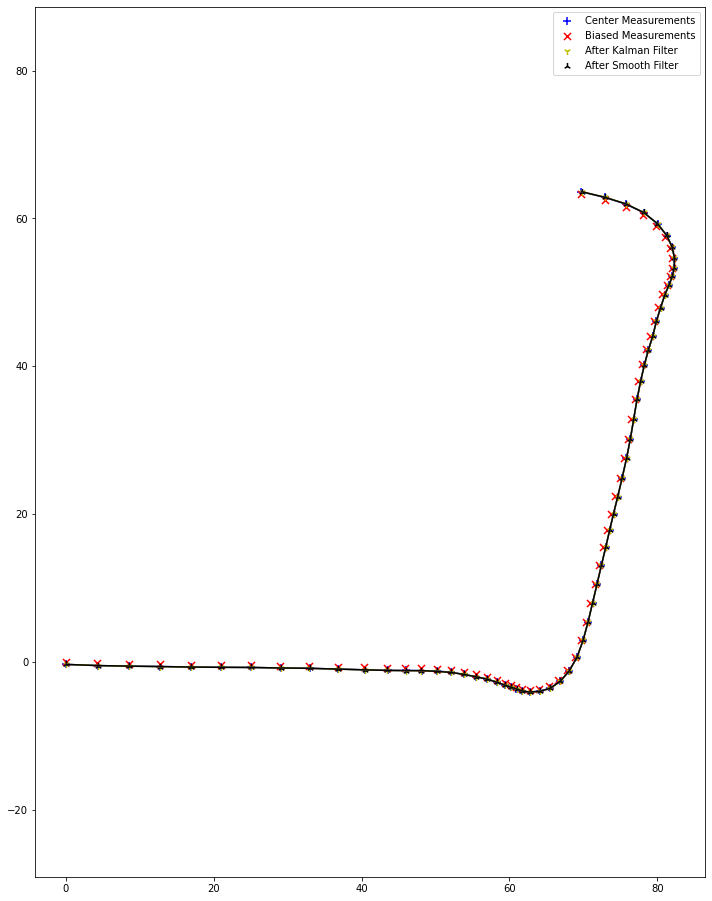

In [218]:
EKF_filter.plot_overview()

In [219]:
## Load the KITTI data
# Change this to the directory where you store KITTI data
basedir = '../data_test/'

# Specify the dataset to load
date = '2011_09_26'
drive = '0022'

# Load the data. Optionally, specify the frame range to load.
# dataset = pykitti.raw(basedir, date, drive)
dataset = raw(basedir, date, drive, frames=range(5000, 8100, 50))
#dataset      = raw(basedir, date, drive)
#print("Selected File Names : ")
#for item in dataset_full.oxts_files:
#    print(item)
print("Total Lenght of the time data ", len(dataset))

Total Lenght of the time data  62


In [225]:
from EKFNet import EKFNet_layers 

from EKFNet import EKFNet 
EKF_filter = EKFNet.EKFNet()
EKF_filter.load_data_set(dataset)
EKF_filter.add_some_noise()
#EKF_filter.run_kf()
EKF_filter.run_EKF_NET_forward()
EKF_filter.generate_fake_grad()
#EKF_filter.plot_overview()
EKF_filter.run_backward()

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[0., 0.],
        [0., 0.]]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]))

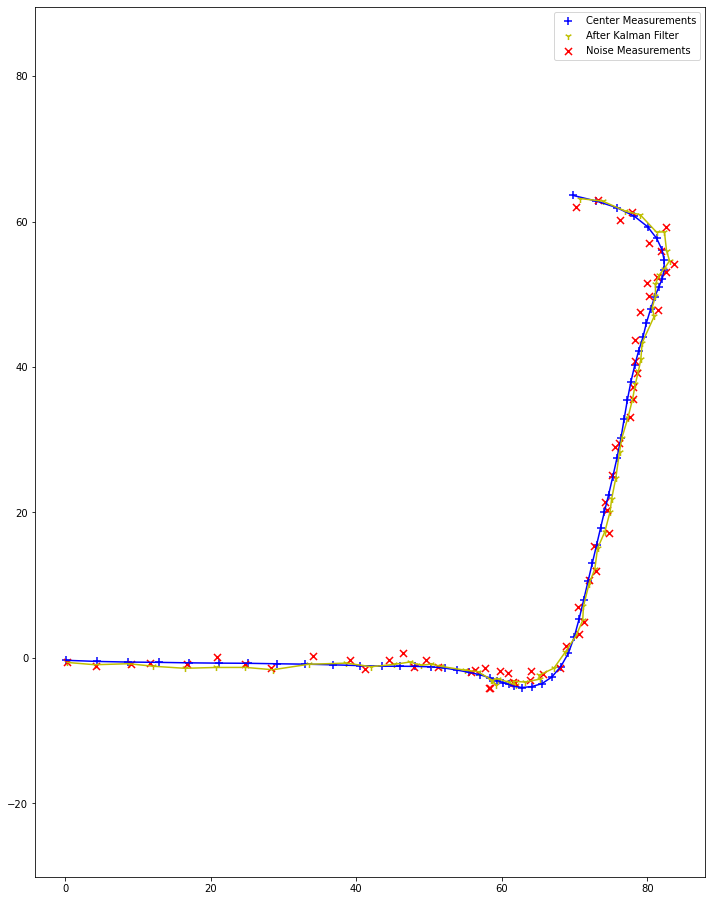

In [222]:
EKF_filter.plot_overview()

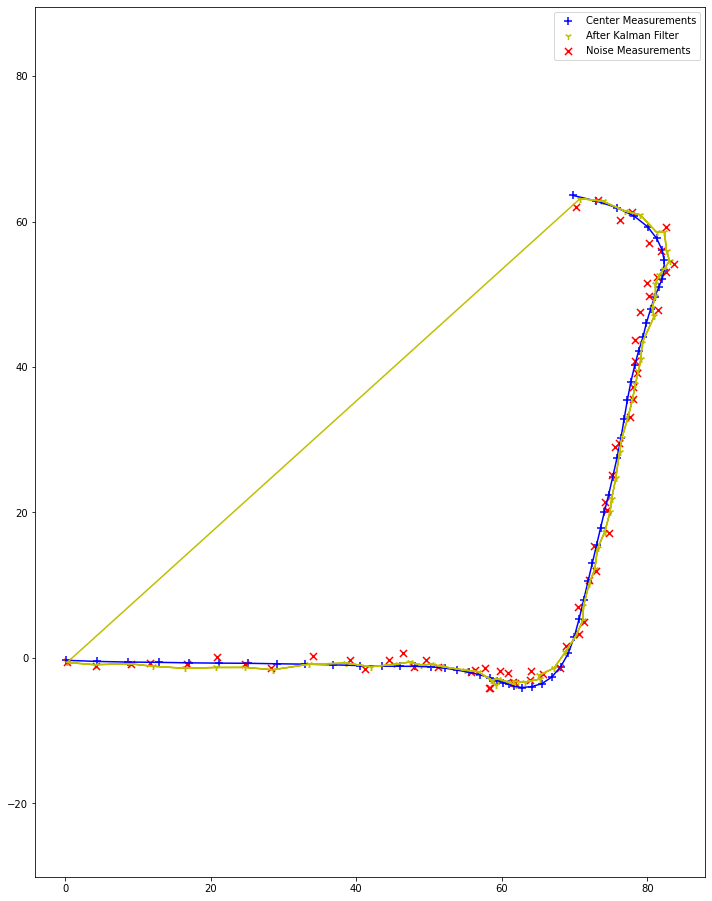

In [223]:
EKF_filter.run_EKF_NET_forward()
EKF_filter.plot_overview()